In [172]:
from HistRF import HistRandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [173]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import math
import timeit
import matplotlib.pyplot as plt

In [174]:
X, y = make_classification(n_samples=50000, n_features=20, n_informative=2)

# X = data.data
# y = data.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [175]:
print(len(X))

50000


In [176]:
n_ests = 20

In [177]:
hrf_acc = []
hrf_time = []
x_bins = 0
num_bins = []
for i in range(8):
    x_bins += 1
    num_bins.append(x_bins)
    n_bins = 2 ** x_bins
    if (n_bins == 256):
        n_bins -= 1
    HRF = HistRandomForestClassifier(max_bins=n_bins, n_estimators=n_ests)
    start = timeit.default_timer()
    HRF.fit(X_train, y_train)
    time=timeit.default_timer() - start

    y_pred = HRF.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    hrf_time.append(time)
    hrf_acc.append(acc)

    print("# of Bins: " + str(n_bins) + "\tAcc: " + str(acc) + "\tTime: " + str(time))


# of Bins: 2	Acc: 0.81504	Time: 23.299514600017574
# of Bins: 4	Acc: 0.86296	Time: 24.05007470000419
# of Bins: 8	Acc: 0.9092	Time: 17.041885400016326
# of Bins: 16	Acc: 0.93216	Time: 18.36215090000769
# of Bins: 32	Acc: 0.9392	Time: 8.67896020002081
# of Bins: 64	Acc: 0.93864	Time: 7.400585199997295
# of Bins: 128	Acc: 0.94096	Time: 9.255070900020655
# of Bins: 255	Acc: 0.94016	Time: 25.127124099992216


In [178]:
print(hrf_acc)
print(hrf_time)

[0.81504, 0.86296, 0.9092, 0.93216, 0.9392, 0.93864, 0.94096, 0.94016]
[23.299514600017574, 24.05007470000419, 17.041885400016326, 18.36215090000769, 8.67896020002081, 7.400585199997295, 9.255070900020655, 25.127124099992216]


In [179]:
from sklearn.ensemble import BaggingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [180]:
from BagDT import BaggedDecisionTreeClassifier
BagDT = BaggedDecisionTreeClassifier(n_estimators=n_ests)
start = timeit.default_timer()
BagDT.fit(X_train, y_train)
time=str(timeit.default_timer() - start)
print("Time: " + str(time))
y_pred = BagDT.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acc: " + str(acc))
rf_acc = [float(acc)] * len(num_bins)
rf_time = [float(time)] * len(num_bins)

Time: 49.855512100009946
Acc: 0.9436


In [181]:
print("Vanilla Random Forest Classifier")
RFclf = RandomForestClassifier(n_estimators=n_ests)
start = timeit.default_timer()
RFclf.fit(X_train, y_train)
time=str(timeit.default_timer() - start)
print("Time: " + str(time))
y_pred = RFclf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acc: " + str(acc))
real_rf_acc = [float(acc)] * len(num_bins)
real_rf_time = [float(time)] * len(num_bins)

Vanilla Random Forest Classifier
Time: 9.535749799979385
Acc: 0.9416


Text(0, 0.5, 'Accuracy')

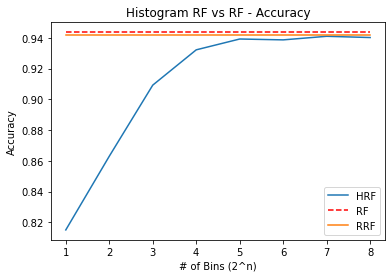

In [182]:
import matplotlib.pyplot as plt
plt.plot(num_bins, hrf_acc, label="HRF")
plt.plot(num_bins, rf_acc, 'r--', label="RF")
plt.plot(num_bins, real_rf_acc, label="RRF")
plt.legend()
plt.title("Histogram RF vs RF - Accuracy")
plt.xlabel("# of Bins (2^n)")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Time (s)')

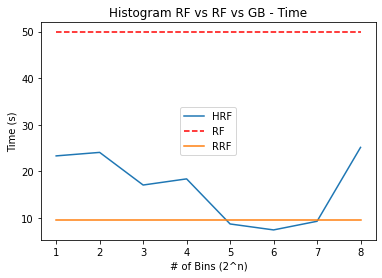

In [183]:
plt.figure()
plt.plot(num_bins, hrf_time, label="HRF")
plt.plot(num_bins, rf_time, 'r--', label="RF")
plt.plot(num_bins, real_rf_time, label="RRF")
plt.legend()
plt.title("Histogram RF vs RF vs GB - Time")
plt.xlabel("# of Bins (2^n)")
plt.ylabel("Time (s)")